---

### Phase 1 - Supervised Techniques

In this first phase, we are going to focus on supervised techniques and their interaction with dimensionality reduction, feature selection, and data augmentation.

For all results reported in this phase, when referring to “performance,” you should measure the average +/- standard deviation of the F1 score calculated using stratified 10-fold cross-validation (the reason for stratification is because our two classes are imbalanced). You may use existing Sklearn functionality to compute the F1 score and to perform cross-validation.

When plotting the performance, you should always produce error bars. Whenever your figure contains more than one line/graph (e.g., performance of two classifiers), you should always make sure those are easily distinguishable (use different colors and markers) and make sure you include a legend.

---

---

### Data Preparation and Initial Exploration

**Importing Pandas:** The script begins by importing the Pandas library, which is essential for data manipulation.

**Defining Paths:** The paths to the dataset and the column names file are defined. This makes it easy to locate the data.

**Loading Data:** The dataset is loaded into a DataFrame without headers because the original data file doesn't include column names.

**Initial Data Exploration:**

- The first few rows are displayed using `data.head()` to get an initial look at the data.
- `data.info()` provides a concise summary, including data types and the count of non-null values, helping identify any missing data.
- `data.describe()` generates descriptive statistics, giving insights into the distribution of numerical features in the dataset.

---

In [79]:
import pandas as pd

# Define path to the datasets
data_path = '/Users/dherya.agarwal/Downloads/breast+cancer+wisconsin+diagnostic/wdbc.data'
names_path = '/Users/dherya.agarwal/Downloads/breast+cancer+wisconsin+diagnostic/wdbc.names'

# Load the data from the CSV file without headers
data = pd.read_csv(data_path, header=None)

# Display the first few rows 
print(data.head())

# Display a concise summary of the DataFrame
print(data.info())

# Display descriptive statistics to understand the distribution of numerical features
print(data.describe())


         0  1      2      3       4       5        6        7       8   \
0    842302  M  17.99  10.38  122.80  1001.0  0.11840  0.27760  0.3001   
1    842517  M  20.57  17.77  132.90  1326.0  0.08474  0.07864  0.0869   
2  84300903  M  19.69  21.25  130.00  1203.0  0.10960  0.15990  0.1974   
3  84348301  M  11.42  20.38   77.58   386.1  0.14250  0.28390  0.2414   
4  84358402  M  20.29  14.34  135.10  1297.0  0.10030  0.13280  0.1980   

        9   ...     22     23      24      25      26      27      28      29  \
0  0.14710  ...  25.38  17.33  184.60  2019.0  0.1622  0.6656  0.7119  0.2654   
1  0.07017  ...  24.99  23.41  158.80  1956.0  0.1238  0.1866  0.2416  0.1860   
2  0.12790  ...  23.57  25.53  152.50  1709.0  0.1444  0.4245  0.4504  0.2430   
3  0.10520  ...  14.91  26.50   98.87   567.7  0.2098  0.8663  0.6869  0.2575   
4  0.10430  ...  22.54  16.67  152.20  1575.0  0.1374  0.2050  0.4000  0.1625   

       30       31  
0  0.4601  0.11890  
1  0.2750  0.08902  
2  0.

---

### Data Preprocessing

**Dropping the ID Column:** The ID column (column 0) is removed from the dataset as it does not contribute to the modeling process.

**Separating Features and Target:**

- The features (independent variables) are stored in `X` after dropping the ID and diagnosis columns.
- The target (dependent variable) is extracted from column 1 and transformed from categorical ('M' for malignant, 'B' for benign) to binary (1 for malignant, 0 for benign).

**Verification:**

- The first few rows of the transformed feature matrix `X` are displayed to confirm the correct columns are retained.
- Similarly, the first few rows of the target vector `y` are displayed to ensure the transformation was successful.


---

In [80]:
# Drop the ID column as it is not useful for modeling and separate features and target
X = data.drop(columns=[0, 1])

# 'M' (malignant) is mapped to 1, and 'B' (benign) is mapped to 0
y = data[1].apply(lambda x: 1 if x == 'M' else 0)

# Display the first few rows of the features
print(X.head())

# Display the first few rows of the target
print(y.head())

      2      3       4       5        6        7       8        9       10  \
0  17.99  10.38  122.80  1001.0  0.11840  0.27760  0.3001  0.14710  0.2419   
1  20.57  17.77  132.90  1326.0  0.08474  0.07864  0.0869  0.07017  0.1812   
2  19.69  21.25  130.00  1203.0  0.10960  0.15990  0.1974  0.12790  0.2069   
3  11.42  20.38   77.58   386.1  0.14250  0.28390  0.2414  0.10520  0.2597   
4  20.29  14.34  135.10  1297.0  0.10030  0.13280  0.1980  0.10430  0.1809   

        11  ...     22     23      24      25      26      27      28      29  \
0  0.07871  ...  25.38  17.33  184.60  2019.0  0.1622  0.6656  0.7119  0.2654   
1  0.05667  ...  24.99  23.41  158.80  1956.0  0.1238  0.1866  0.2416  0.1860   
2  0.05999  ...  23.57  25.53  152.50  1709.0  0.1444  0.4245  0.4504  0.2430   
3  0.09744  ...  14.91  26.50   98.87   567.7  0.2098  0.8663  0.6869  0.2575   
4  0.05883  ...  22.54  16.67  152.20  1575.0  0.1374  0.2050  0.4000  0.1625   

       30       31  
0  0.4601  0.11890  
1 

---

### Part 1: Implementing Simple Classifiers [15pts]

**What to implement:** 
In this question, you should implement:
1. A decision tree classifier that uses the Information Gain splitting criterion.
2. A Naive Bayes classifier that uses Gaussian modeling for continuous features.

**What to plot:** 
You should produce a bar chart that shows the performance of your classifiers on the dataset.


---

---

### Decision Tree Implementation

**Class Initialization:** To control the maximum depth of the tree, the `DecisionTreeClassifier` class is initialized with an optional `max_depth` argument. Every node in the decision tree is represented by a nested `Node` class, which has properties for the feature index, threshold, left and right subtrees, information gain, and value.

**Entropy Calculation:** An impurity measure called entropy is computed for a set of class labels using the `_entropy` method.

**Information Gain Calculation:** To assist in choosing the optimal feature and threshold, the `_info_gain` method computes the information gain from a split.

**Best Split:** To determine the split that yields the most information gain, the `_best_split` method iterates over all characteristics and potential thresholds.

**Building the Tree:** The decision tree is constructed recursively by the `_build_tree` function, which ends when it reaches the maximum depth or when more splitting does not yield more information.

**Adapting the Model:**

- Using the training data, the `fit` technique initiates the tree-building process.

**Estimating Classes:**

- To generate predictions, the `predict` method iterates through the constructed tree for every sample.


---

In [81]:
import numpy as np

class DecisionTreeClassifier:
    def __init__(self, max_depth=None):
        # Initialize the decision tree with max depth
        self.max_depth = max_depth
        self.tree = None

    class Node:
        def __init__(self, feature_index=None, threshold=None, left=None, right=None, info_gain=None, value=None):
            # Initialize a node in the decision tree
            self.feature_index = feature_index 
            self.threshold = threshold 
            self.left = left 
            self.right = right  
            self.info_gain = info_gain  
            self.value = value  

    def _entropy(self, y):
        # Calculate the entropy of a distribution
        class_labels = np.unique(y)
        entropy = 0
        for cls in class_labels:
            p_cls = len(y[y == cls]) / len(y)
            entropy += -p_cls * np.log2(p_cls)
        return entropy

    def _info_gain(self, y, y_left, y_right):
        # Calculate the information gain
        parent_entropy = self._entropy(y)
        left_entropy = self._entropy(y_left)
        right_entropy = self._entropy(y_right)
        n = len(y)
        n_left = len(y_left)
        n_right = len(y_right)
        # Weighted average of the entropy of the children
        child_entropy = (n_left / n) * left_entropy + (n_right / n) * right_entropy
        return parent_entropy - child_entropy

    def _best_split(self, X, y):
        # Find the best feature and threshold to split
        max_info_gain = -1
        n_samples, n_features = X.shape
        best_feature_index, best_threshold = None, None
        for feature_index in range(n_features):
            feature_values = X[:, feature_index]
            possible_thresholds = np.unique(feature_values)
            for threshold in possible_thresholds:
                y_left = y[feature_values <= threshold]
                y_right = y[feature_values > threshold]
                if len(y_left) > 0 and len(y_right) > 0:
                    info_gain = self._info_gain(y, y_left, y_right)
                    if info_gain > max_info_gain:
                        max_info_gain = info_gain
                        best_feature_index = feature_index
                        best_threshold = threshold
        return best_feature_index, best_threshold, max_info_gain

    def _build_tree(self, X, y, depth=0):
        # Build the tree recursively
        n_samples, n_features = X.shape
        # If only one or all samples belong to just one class, create a leaf node
        if n_samples <= 1 or len(np.unique(y)) == 1:
            leaf_value = np.bincount(y).argmax()
            return self.Node(value=leaf_value)
        # If the maximum depth is reached, create a leaf node
        elif self.max_depth is not None and depth >= self.max_depth:
            leaf_value = np.bincount(y).argmax()
            return self.Node(value=leaf_value)

        # Find the best feature and threshold to split on
        best_feature_index, best_threshold, info_gain = self._best_split(X, y)
        # If no information gain, create a leaf node
        if info_gain == 0:
            leaf_value = np.bincount(y).argmax()
            return self.Node(value=leaf_value)

        # Recursively build the left and right subtrees
        left_indices = X[:, best_feature_index] <= best_threshold
        right_indices = X[:, best_feature_index] > best_threshold
        left_subtree = self._build_tree(X[left_indices], y[left_indices], depth + 1)
        right_subtree = self._build_tree(X[right_indices], y[right_indices], depth + 1)
        return self.Node(best_feature_index, best_threshold, left_subtree, right_subtree, info_gain)

    def fit(self, X, y):
        # Fit the decision tree to the training data
        self.tree = self._build_tree(X, y, 0)

    def predict(self, X):
        # Predict the class for each sample
        def traverse(node, sample):
            if node.value is not None:
                return node.value
            if sample[node.feature_index] <= node.threshold:
                return traverse(node.left, sample)
            return traverse(node.right, sample)

        # Traverse the tree on X
        return [traverse(self.tree, sample) for sample in X]

# Create a decision tree classifier with a maximum depth of 3
tree_model = DecisionTreeClassifier(max_depth=3)
# Fit the model to the training data
tree_model.fit(X.values, y.values) 

# Predict using the trained model
predictions = tree_model.predict(X.values)
print(predictions[:100])  # Show the first hundred predictions


[1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1]


---

### Gaussian Naive Bayes Implementation

**Class Initialization:** To avoid division by zero when calculating variance, the `GaussianNaiveBayes` class is initialized using an optional `epsilon` parameter. The parameters for each class (mean, variance, and prior) are kept in a dictionary called `params`.

**Adapting the Model:**

- The `fit` approach uses the training data to compute the mean, variance, and prior probability for each class.
- It computes the mean and variance of the characteristics for each class, builds a Boolean mask to choose the samples that belong to that class, and determines the prior probability.

**Probability Density Function:** For a given feature value, mean, and variance, the `_pdf` technique calculates the probability density function of a Gaussian distribution.

**Estimating Classes:**

- The posterior probabilities for each class for each sample are determined using the `predict` technique. The posterior probability is calculated by summing the log likelihoods after computing the prior and likelihoods for each sample iteratively.
- The forecast is made for the class with the highest posterior probability.


---

In [82]:
import numpy as np

class GaussianNaiveBayes:
    def __init__(self, epsilon=1e-40):
        # Initialize the Gaussian Naive Bayes classifier
        # It is initialized with a small epsilon to avoid division by zero
        self.params = {}  # Dictionary to store parameters
        self.epsilon = epsilon  # Epsilon

    def fit(self, X, y):
        # Fit GNB to the training data
        class_labels = np.unique(y) 
        for cls in class_labels:
            cls_indices = y == cls  
            cls_features = X[cls_indices]  
            self.params[cls] = {
                'mean': cls_features.mean(axis=0),  
                'variance': np.maximum(cls_features.var(axis=0), self.epsilon), 
                'prior': cls_indices.sum() / len(X)
            }

    def _pdf(self, x, mean, variance):
        # Calculate the probability density function of a Gaussian distribution
        coef = 1 / np.sqrt(2 * np.pi * variance)   
        exp = np.exp(-((x - mean) ** 2) / (2 * variance)) 
        return coef * exp

    def predict(self, X):
        # Predict the class for each sample
        # Initialize predictions array
        predictions = np.zeros(X.shape[0]) 
        for idx, sample in enumerate(X):
            posteriors = []  
            for cls, params in self.params.items():
                prior = np.log(params['prior'])  
                likelihoods = self._pdf(sample, params['mean'], params['variance'])  
                if np.any(likelihoods == 0):
                    likelihoods[likelihoods == 0] = self.epsilon  # Prevent zero likelihood
                likelihood = np.sum(np.log(likelihoods))  
                posterior = prior + likelihood  
                posteriors.append(posterior)
            predictions[idx] = np.argmax(posteriors)  
        return predictions.astype(int)  


# Create a Gaussian Naive Bayes classifier
nb_model = GaussianNaiveBayes()
# Fit the model to the training data
nb_model.fit(X.values, y.values)

# Predict using the trained model
nb_predictions = nb_model.predict(X.values)
print(nb_predictions[:100])  # Show the first hundred predictions


[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 0 1 1 0 0 1 1 0 1 0 1 0 0 0 0 0 1 0 0 1 1 0 0 0 0 1 0 1 1 0 0 1 0 1 0 1 0
 0 1 0 1 1 0 0 1 1 1 0 1 0 1 0 1 0 0 0 0 1 1 0 0 0 0]


---

**Cross-Validation Function**

A model can be subjected to k-fold cross-validation using the `cross_validate` function. To ensure that every fold preserves the same class distribution as the original dataset, it employs stratified k-fold. The data is divided into training and testing sets for every fold. Next, the training set is used to fit the model, and the testing set is utilized to generate predictions. Every fold's F1 score is determined and recorded in a list. Lastly, the list of F1 scores is returned by the function.

**Preparing Data**

To make the feature matrix `X` and the target vector `y` compatible with the cross-validation algorithm, they are converted to NumPy arrays.

**Cross-Checking**

Both the `GaussianNaiveBayes` and `DecisionTreeClassifier` models call the `cross_validate` function.

**Statistics Calculation**

Using NumPy routines, the F1 scores' mean and standard deviation are determined for each model.

**Output**

A printed version of the F1 scores for both models' mean and standard deviation is provided.


---

In [83]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import f1_score

def cross_validate(model, X, y, k=10):
    # Perform k-fold cross-validation where k=10
    skf = StratifiedKFold(n_splits=k)  # Use stratified K-Folds to maintain class distribution
    scores = []  # List to store F1 scores for each fold

    for train_index, test_index in skf.split(X, y):
        # Split the data into training and testing sets for the current fold
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        
        # Fit the model on the training data
        model.fit(X_train, y_train)
        
        # Predict on the testing data
        predictions = model.predict(X_test)
        
        # Calculate the F1 score for the current fold
        score = f1_score(y_test, predictions)
        
        # Append the score to the list of scores
        scores.append(score)

    return scores  # Return the list of F1 scores 

# Converting to NumPy arrays
X_np = X.values
y_np = y.values

# Perform cross-validation on the Decision Tree
dt_scores = cross_validate(DecisionTreeClassifier(max_depth=3), X_np, y_np)

# Perform cross-validation on the GNB
nb_scores = cross_validate(GaussianNaiveBayes(), X_np, y_np)

# Calculate the mean and standard deviation of F1 scores for the Decision Tree
dt_mean, dt_std = np.mean(dt_scores), np.std(dt_scores)

# Calculate the mean and standard deviation of F1 scores for the GNB
nb_mean, nb_std = np.mean(nb_scores), np.std(nb_scores)

# Print the mean and standard deviation of F1 scores for both models
print((dt_mean, dt_std), (nb_mean, nb_std))


(0.9023405459206588, 0.06587264407097052) (0.9075037751000018, 0.04369552529721077)


---

## Plotting Data

### Identify the classifiers' labels, means, and errors

- **Classifiers' Labels**: Names of the classifiers.
- **Means**: Mean F1 scores.
- **Errors**: Error values associated with the means.

### Plot Configuration

- **Label Positions' Range (x)**: Define the range for x-axis labels.
- **Bars' Width**: Determine the width of the bars.

### Axis and Figure Creation

To generate a figure and axis for the plot, use `plt.subplots()`.

### Bar Plot

Using `ax.bar()`, create a bar plot with error bars, adjusting the error bars' color and capsize.

### Labels and Headline

- **Title**: Assign a title to the plot.
- **Custom X-axis Tick Labels**: Set custom labels for the x-axis ticks.
- **Y-axis Label**: Provide a label for the y-axis.

### Legend

Give the plot a legend to distinguish between different classifiers.

### Labeling Function

Define `autolabel()` to format the height (mean F1 score) to two decimal places and add text labels to each bar.

### Display Plot

To view the plot, use `plt.show()`.

---

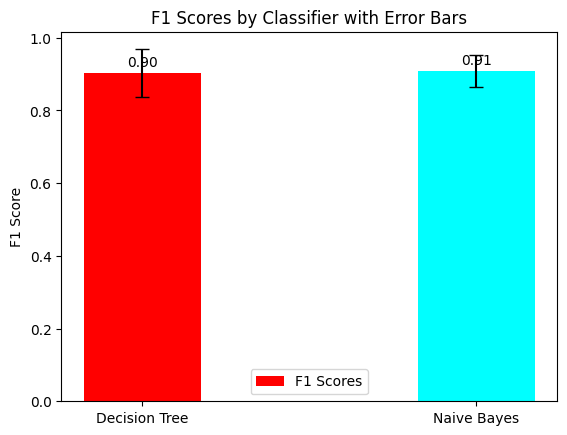

In [84]:
import matplotlib.pyplot as plt

# Data for plotting
labels = ['Decision Tree', 'Naive Bayes']
means = [dt_mean, nb_mean]
errors = [dt_std, nb_std]

x = range(len(labels))  
width = 0.35 

# Create a figure and axis for the plot
fig, ax = plt.subplots()

# Create bar plot with error bars
rects = ax.bar(x, means, width, yerr=errors, label='F1 Scores', color=['red', 'cyan'], capsize=5)

# Set labels, title, and custom x-axis tick labels
ax.set_ylabel('F1 Score')
ax.set_title('F1 Scores by Classifier with Error Bars')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

# Function to add labels to the bars
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}',  
                    xy=(rect.get_x() + rect.get_width() / 2, height),  
                    xytext=(0, 3),  
                    textcoords="offset points",
                    ha='center', va='bottom')  
# Add labels to the bars
autolabel(rects)

# Show the plot
plt.show()


---

### Part 2 : Dimensionality Reduction with the Singular Value Decomposition [10pts]

**What to implement:** 
The Singular Value Decomposition (SVD) is an extremely useful tool from linear algebra that can help us approximate a data matrix (such as the instance-by-feature matrix that represents our data) into a smaller dimension, hence reducing the dimensionality of the data. In this question, you should use the SVD (you may use the existing NumPy library) to approximate the data in different ranks. 

**Important:** Because we are dealing with supervised learning, given a train/test split, to avoid data leakage, you should always make sure that you only compute the SVD on the train split and project the test instances to that space, in the same way that the Latent Semantic Analysis paper [1] does.

**What to plot:** 
You should produce a figure that shows the performance of your classifiers as a function of the SVD approximation rank.


---

---

## Data Splitting

### Using train test split

The dataset is divided into training and testing sets, with 80% of the data being utilized for training and 20% for testing. Reproducibility is guaranteed via the `random_state` argument.

### Singular Value Decomposition (SVD)

Using `np.linalg.svd`, SVD is applied to the training set, breaking down `X_train` into three matrices: `U`, `Sigma`, and `VT`. The resultant matrices are guaranteed to be the right size for dimensionality reduction by the `full_matrices=False` argument.

### Data Projection Function

Using the first `k` columns of `VT`, the `project_data` function projects data into a lower-dimensional space. `VT[:k]` extracts the first `k` columns of `VT`, and `T` transposes them. The data `X` is projected into the `k`-dimensional subspace denoted by `V_k` via the function `np.dot(X, V_k)`.

### Dimensionality Reduction

Using the `project_data` function with `k=2`, the training and testing sets are projected onto a 2-dimensional environment.

### Output

To confirm the dimensionality reduction, the reduced training and testing sets' forms are printed.


---

In [85]:
import numpy as np
from sklearn.model_selection import train_test_split

# Step 1: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, test_size=0.2, random_state=42)

# Step 2: Compute Singular Value Decomposition (SVD) on the training set
U, Sigma, VT = np.linalg.svd(X_train, full_matrices=False)

# Project data into k-dimensional space using the first k columns of V^T
def project_data(X, VT, k):
    V_k = VT[:k].T  # Take the first k columns from V^T and transpose to get V_k
    return np.dot(X, V_k)  # Project data onto the k-dimensional subspace

# Example with k=2 (reduce dimensionality to 2)
X_train_reduced = project_data(X_train, VT, 2)
X_test_reduced = project_data(X_test, VT, 2)

# Example with k=2 (reduce dimensionality to 4)
X_train_reduced4 = project_data(X_train, VT, 4)
X_test_reduced4 = project_data(X_test, VT, 4)

# Show the shape of the reduced datas
print(X_train_reduced.shape, X_test_reduced.shape)
print(X_train_reduced4.shape, X_test_reduced4.shape)


(455, 2) (114, 2)
(455, 4) (114, 4)


---

## Cross-Validation Function

The `cross_validate` function takes a model and applies k-fold cross-validation on it. It returns a list of F1 scores after determining the F1 score for each fold. The original dataset (`X` and `y`), `project_data`, and `VT` are assumed to have definitions elsewhere.

### SVD Rank Evaluation

The maximum number of dimensions for SVD is determined by setting `max_rank` to the smaller dimension of the training set. The mean F1 scores for Decision Tree and Naive Bayes models are kept in lists called `dt_f1_scores` and `nb_f1_scores`, respectively. From 1 to `max_rank`, the range of ranks (`ranks`) is defined.

### Model Evaluation

Using the specified SVD components `VT`, the data is projected to `k` dimensions for each rank `k`. Ten-fold cross-validation is used to assess the Decision Tree and Naive Bayes models, and the mean F1 scores are noted.

### Plotting

Matplotlib is used to plot the F1 scores versus the SVD ranks. The plot has a grid, legend, labels, and a title to aid with visualization.


---

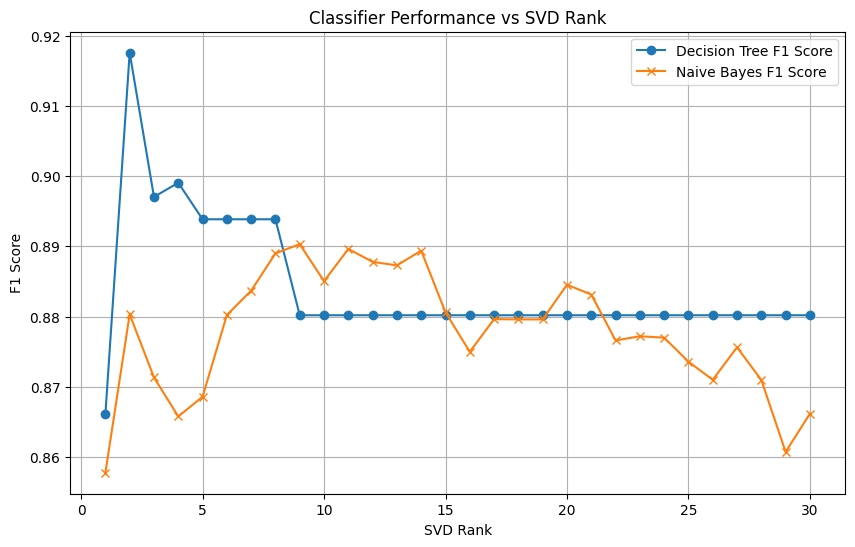

In [86]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score
from sklearn.model_selection import StratifiedKFold

def cross_validate(model, X, y, k=10):
    # Perform k-fold cross-validation on the given model
    skf = StratifiedKFold(n_splits=k)
    scores = []  # List to store F1 scores for each fold
    for train_index, test_index in skf.split(X, y):
        # Split the data into training and testing sets for the current fold
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        
        # Fit the model on the training data
        model.fit(X_train, y_train)
        
        # Predict on the testing data
        predictions = model.predict(X_test)
        
        # Calculate the F1 score for the current fold
        score = f1_score(y_test, predictions)
        
        # Append the score to the list of scores
        scores.append(score)
    return scores  # Return the list of F1 scores for all folds

# Assume project_data, VT, and the original dataset X and y are defined elsewhere
max_rank = min(X_train.shape)  
dt_f1_scores = []  
nb_f1_scores = []  
ranks = range(1, max_rank + 1)  

for k in ranks:
    # Project data to k dimensions
    X_reduced = project_data(X.values, VT, k)  

    # Decision Tree evaluation using cross-validation
    dt_model = DecisionTreeClassifier(max_depth=3)
    dt_scores = cross_validate(dt_model, X_reduced, y.values, k=10)  
    dt_f1_scores.append(np.mean(dt_scores)) 

    
    # GNB evaluation using cross-validation
    nb_model = GaussianNaiveBayes() 
    nb_scores = cross_validate(nb_model, X_reduced, y.values, k=10)  
    nb_f1_scores.append(np.mean(nb_scores))  

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(ranks, dt_f1_scores, label='Decision Tree F1 Score', marker='o')
plt.plot(ranks, nb_f1_scores, label='Naive Bayes F1 Score', marker='x')
plt.xlabel('SVD Rank')
plt.ylabel('F1 Score')
plt.title('Classifier Performance vs SVD Rank')
plt.legend()
plt.grid(True)
plt.show()


---

## Graph 2 : Classifier Performance vs SVD Rank

**Blue Line (Circles):** Shows the performance of the Decision Tree classifier as the SVD rank increases.

**Orange Line (Crosses):** Shows the performance of the Naive Bayes classifier as the SVD rank increases.

**Trends:**


**Decision Tree Classifier:**

- With few SVD components at first, the F1 Score rises quickly and peaks at rank two or three.
- Following the peak, performance gradually declines until stabilizing and staying largely constant at higher ranks.

**Bayesian Naive Classifier:**

- When compared to the Decision Tree classifier, the F1 Score exhibits greater variability.
- Performance is lower at first and varies as rank rises, showing no discernible upward or declining tendency.
- Higher ranks show a minor decline in performance, indicating that the Naive Bayes classifier may not gain as much from additional components.

**In summary:**

**Benefits of Dimensionality Reduction:** Performance of the Decision Tree classifier is much enhanced when the number of primary components in the data is reduced to a small number (around two or three). The Naive Bayes classifier performs more inconsistently when SVD rankings change and has fewer obvious advantages from SVD.

**Overall Performance:** The Decision Tree classifier's resilience to dimensionality reduction is demonstrated by the fact that it continuously outperforms the Naive Bayes classifier over a range of SVD ranks.

These patterns imply that while the impact on some classifiers like decision trees may be more variable, dimensionality reduction with SVD can successfully boost those classifiers' performance.


---

---

### Part 3 : Feature Selection with Randomization [15pts]

**What to implement:** 
Randomization is a very powerful tool in helping us understand whether a piece of data contains useful information for a given task or whether the information contained is close to random. In this question, you should implement the following feature selection technique which randomizes each feature of the data and measures how predictive it is for our task.

In order to avoid data leakage, for this question only, you should conduct the feature selection on a 20% stratified random sample of the entire dataset, leaving the remaining 80% as the data on which you will report the performance on your plot.

a. For every feature, generate a copy of the dataset where that feature values are randomized (i.e., randomly permuted).<br>
b. Train two versions of the model: one with the actual data and one with the data that contains the randomized feature.<br>
c. Test on part of the hold-out set that is for validation and use the difference in performance as a score for that feature.<br>
d. Steps b and c should be done as part of 5-fold cross-validation train/test splits on the feature selection sample and produce an average F1 score for each of the two models (regular and “randomized feature”).<br>
e. If randomization of the feature results in a drop of performance, the percentage of the drop can be used to characterize how important this feature is for the task.<br>
f. Repeat for all features and rank features according to the above metric, from most predictive to least predictive.<br>

**What to plot (2 figures in total):**
i. A bar chart that shows each feature and the calculated importance.<br>
ii. Performance of the classifiers when using top 1 to top 10 features (cumulatively).<br>

---


---

## Stratified Sampling

To maintain class distribution, the dataset is divided into two groups: a holdout set (`X_holdout`, `y_holdout`) and a 20% stratified sample (`X_small`, `y_small`).

### Getting Ready for the Outcomes

To hold the importance scores for every feature, a DataFrame `feature_importance` is created.

### Randomization and Evaluation of Features

Every feature is changed one at a time, and the effect on the performance of the model is assessed. The F1 scores for the original and randomized data are stored in lists `scores_original` and `scores_randomized`, respectively, for each feature.

### Cross-Validation

The performance of the model is assessed using stratified 5-fold cross-validation. The original and randomized data are used to train the model, and the F1 scores are computed for every fold.

### Performance Calculation

The original and randomized data's average F1 scores are computed. The `feature_importance` DataFrame is used to calculate and store the performance decline as a percentage.

### Feature Ranking

The `feature_importance` DataFrame is ordered in accordance with the features' ranking, which is determined by the performance decline.

### Printing the Ranked Features

Ranked features are printed.

---

In [88]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import f1_score
from sklearn.utils import shuffle

# Step 1: Create a 20% stratified sample of the entire dataset
X_small, X_holdout, y_small, y_holdout = train_test_split(X, y, test_size=0.8, stratify=y, random_state=42)

# Prepare to store results
feature_importance = pd.DataFrame(index=range(X.shape[1]), columns=['Feature', 'Score'])

# Step 2: Randomize each feature and evaluate its importance
for i in range(X_small.shape[1]):
    scores_original = []
    scores_randomized = []

    # Step 3: 5-fold cross-validation
    kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    for train_index, test_index in kf.split(X_small, y_small):
        X_train, X_test = X_small.iloc[train_index], X_small.iloc[test_index]
        y_train, y_test = y_small.iloc[train_index], y_small.iloc[test_index]

        # Train on original data
        model = DecisionTreeClassifier(max_depth=3) 
        model.fit(X_train, y_train)
        pred = model.predict(X_test)
        score_orig = f1_score(y_test, pred)
        scores_original.append(score_orig)

        # Train on data with randomized feature
        X_train_randomized = X_train.copy()
        X_train_randomized.iloc[:, i] = shuffle(X_train_randomized.iloc[:, i].values, random_state=42)
        model.fit(X_train_randomized, y_train)
        pred_random = model.predict(X_test)
        score_rand = f1_score(y_test, pred_random)
        scores_randomized.append(score_rand)

    # Step 4: Calculate the average drop in performance
    mean_original = np.mean(scores_original)
    mean_randomized = np.mean(scores_randomized)
    feature_importance.loc[i, 'Feature'] = X.columns[i] 
    feature_importance.loc[i, 'Score'] = (mean_original - mean_randomized) / mean_original * 100

# Step 5: Rank features based on the drop in performance
feature_importance.sort_values(by='Score', ascending=False, inplace=True)
feature_importance.reset_index(drop=True, inplace=True)

# Print the ranked features
print(feature_importance)


   Feature     Score
0       19  6.557277
1        5  5.360192
2       26  3.831089
3        3  3.762186
4       14  3.716261
5       30  3.667669
6        9   3.41294
7       25  3.040141
8        2  2.563307
9       16  2.517345
10       6  2.500277
11      12  2.133119
12       7  1.938463
13      27  1.307594
14      28  0.968538
15      11  0.889065
16      24  0.204665
17       4  0.168998
18      13       0.0
19      23       0.0
20      21 -0.205085
21       8 -1.083949
22      31 -1.377859
23      18 -1.792046
24      17 -2.418811
25      22 -2.445317
26      29 -2.454802
27      20 -2.501634
28      15 -3.938383
29      10 -5.297219


---


### Cross-Validation Function:
Using the F1 score to assess the model on the test set, a custom cross-validation function was developed to carry out stratified k-fold cross-validation.

### Features' Significance Visualization:
To find the most important qualities, a bar chart was used to show the features' relative value, which was based on the results of a randomization test.

### Data Preparation:
In order to prepare the data for classifier performance evaluation, the features were rearranged according to their significance.

### Classifier Performance Evaluation:
Using the cross-validation function, the Decision Tree and Naive Bayes classifiers were assessed for subsets of the top features (from top 1 to top 10). The standard deviation and mean F1 score were computed and recorded.

### Performance Visualization:
The mean F1 score and standard deviation for the top 1 to top 10 features were displayed as error bars to illustrate the classifiers' performance and provide insight into how feature selection affects model accuracy.


---

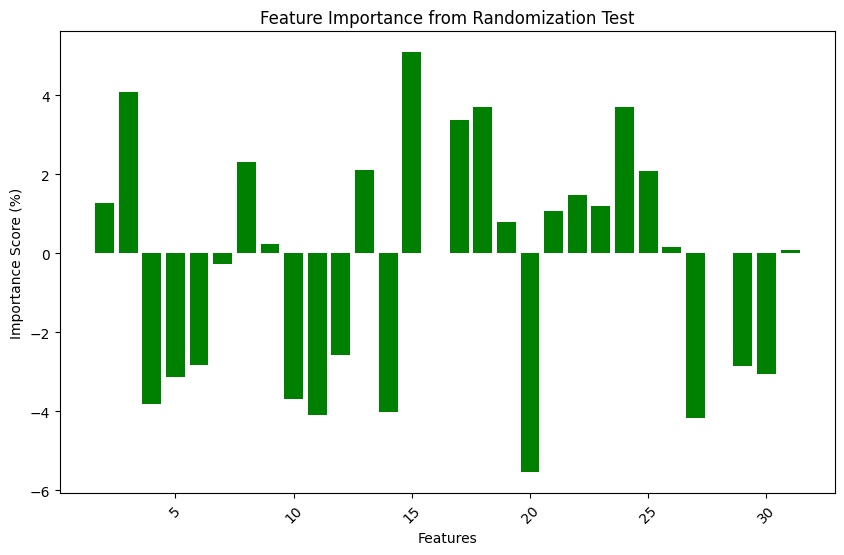

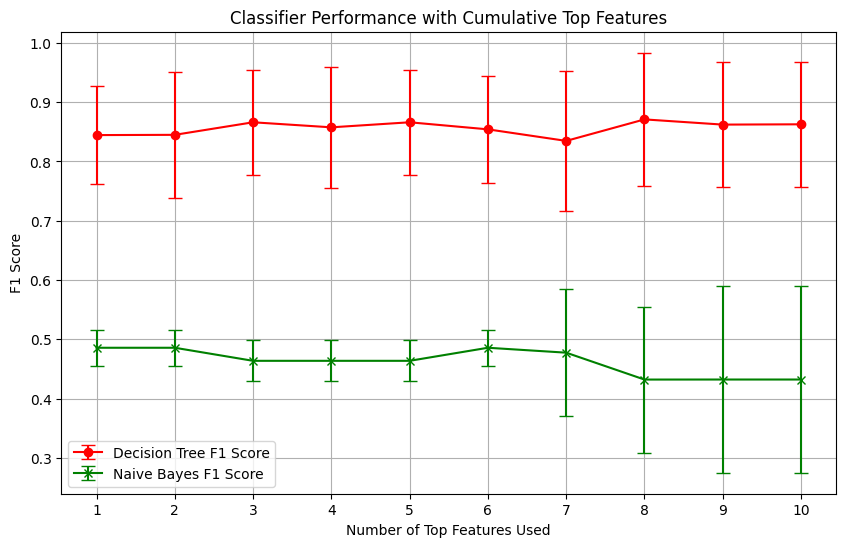

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.metrics import f1_score


def cross_validate(model, X, y, k=10):
    skf = StratifiedKFold(n_splits=k)
    scores = []
    for train_index, test_index in skf.split(X, y):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        model.fit(X_train, y_train)
        predictions = model.predict(X_test)
        score = f1_score(y_test, predictions, average='weighted') 
        scores.append(score)
    return scores

# Plot 1: Bar Chart of Feature Importance
plt.figure(figsize=(10, 6))
plt.bar(feature_importance['Feature'], feature_importance['Score'], color='green')
plt.xlabel('Features')
plt.ylabel('Importance Score (%)')
plt.title('Feature Importance from Randomization Test')
plt.xticks(rotation=45)
plt.show()

# Prepare data for Plot 2
X_filtered = X_small[feature_importance['Feature'].tolist()]  
cumulative_features = []
dt_scores_cumulative = []
dt_errors_cumulative = []
nb_scores_cumulative = []
nb_errors_cumulative = []

# Evaluate classifier performance for top 1 to top 10 features
for top_n in range(1, 11):
    selected_features = X_filtered.iloc[:, :top_n]  
    cumulative_features.append(selected_features.columns.tolist())

    # Decision Tree Classifier
    dt_model = DecisionTreeClassifier(max_depth=3)
    dt_scores = cross_validate(dt_model, selected_features, y_small, k=10)
    dt_scores_cumulative.append(np.mean(dt_scores))
    dt_errors_cumulative.append(np.std(dt_scores))

    # Naive Bayes Classifier
    nb_model = GaussianNaiveBayes()
    nb_scores = cross_validate(nb_model, selected_features, y_small, k=10)
    nb_scores_cumulative.append(np.mean(nb_scores))
    nb_errors_cumulative.append(np.std(nb_scores))

# Plot 2: Classifier Performance Using Top 1 to Top 10 Features
plt.figure(figsize=(10, 6))
plt.errorbar(range(1, 11), dt_scores_cumulative, yerr=dt_errors_cumulative, label='Decision Tree F1 Score', marker='o', color='red', capsize=5)
plt.errorbar(range(1, 11), nb_scores_cumulative, yerr=nb_errors_cumulative, label='Naive Bayes F1 Score', marker='x', color='green', capsize=5)
plt.xlabel('Number of Top Features Used')
plt.ylabel('F1 Score')
plt.title('Classifier Performance with Cumulative Top Features')
plt.xticks(range(1, 11))
plt.legend()
plt.grid(True)
plt.show()


---

## Graph 3.1: Feature Importance from Randomization Test

The importance score of each characteristic is represented by a bar. The feature's contribution to the model's performance is shown by the bar's height. Positive scores show that the feature improves the model's performance, whilst negative scores show that the feature's inclusion has a negative impact.

Certain features have high positive significance scores, meaning that they greatly enhance the functionality of the model. Certain features have negative significance scores, indicating that the model may not benefit from them or that they could contribute noise.

Which features are more important for the model's predictions can be seen by looking at the differences in significance scores between features.


---

---


## Graph 3.2: Cumulative Top Features and Classifier Performance

**Error Bars:** Show the standard deviation of the F1 scores obtained from ten-fold cross-validation, which reflects performance variability.

**Trends:**

- **Decision Tree:** The Decision Tree classifier's resilience to feature selection is indicated by the F1 Score, which stays comparatively high and constant across a range of top feature counts.
- **Naive Bayes:** Compared to the Decision Tree, the Naive Bayes classifier's F1 Score is lower and more variable. More characteristics do not considerably enhance performance, indicating that Naive Bayes may not gain as much from the extra best features.

The range of performance variability is displayed by the error bars for both classifiers; in general, the Decision Tree has lower error bars than Naive Bayes, indicating more consistent performance.

**In summary:**

When using the top features, the Decision Tree classifier outperforms the Naive Bayes classifier in terms of overall performance and stability. Particularly for the Decision Tree, choosing the best features based on relevance scores aids in enhancing or maintaining classifier performance.


---

---

### Data Augmentation using SMOTE [10pts]

**What to implement:** 
As we saw in class, SMOTE is one of the earliest and very successful data augmentation (or minority class oversampling) techniques. You can use the pseudocode included in the original SMOTE paper [2] as a basis for your implementation.

**What to plot:** 
The performance of your classifiers as a function of the percentage of oversampled minority samples (100%, 200%, 300%) for k = 1, and k = 5. This plot should contain 2 lines per classifier (one for each k).

---



---


## Function Definition: SMOTE

The `SMOTE` function uses the SMOTE algorithm to create synthetic samples for the minority class. The k-nearest neighbors algorithm's parameters are `k_neighbors`, `n_synthetic_samples`, which specifies how many synthetic samples to make, and `random_state`, which is used for reproducibility.

### Random Seed

To guarantee reproducibility, if `random_state` is supplied, the random seed is set.

### Determine Artificial Samples

It is calculated to get the number of minority class samples (`n_min_samples`). In order to balance the classes, if `n_synthetic_samples` is not supplied, the number of majority class samples less the minority class samples is used by default.

### Samples from Minority Classes

Take the dataset's minority class samples and extract them.

### K-Nearest Adjacents

Utilizing the minority class data, train the k-nearest neighbors model.

### Create Synthetic Samples

Determine the k-nearest neighbors of each minority class sample. By choosing a neighbor at random and creating a new sample along the line segment between the sample and its neighbor, you can create synthetic samples. Make sure that `n_synthetic_samples` and the number of synthetic samples generated are equal.

### Integrate Synthetic and Original Data

Create a NumPy array from the list of synthetic samples. Make labels to go with the fake samples. To build the enhanced dataset, combine the synthetic samples with the original dataset.

### Give back the augmented dataset

The function yields the label vector `y_new` and the enhanced feature matrix `X_new`.


---


In [63]:
import numpy as np
from sklearn.neighbors import NearestNeighbors

def smote(X, y, k_neighbors=5, n_synthetic_samples=None, random_state=None):
    if random_state:
        np.random.seed(random_state)  # For reproducibility
    
    # Calculate the number of synthetic samples to create if not provided

    n_min_samples = np.sum(y == 1)  # Count the number of minority class samples
    if n_synthetic_samples is None:
        n_synthetic_samples = np.sum(y == 0) - n_min_samples 

    # Only the minority class samples
    minority_class_samples = X[y == 1]

    # Train k-Nearest Neighbors on the minority class samples
    neigh = NearestNeighbors(n_neighbors=k_neighbors + 1)
    neigh.fit(minority_class_samples)

    synthetic_samples = []  
    for i in range(n_min_samples):
        # Find k-nearest neighbors for the current minority sample
        nn = neigh.kneighbors([minority_class_samples[i]], return_distance=False)
        for _ in range(n_synthetic_samples // n_min_samples): 
            nn_index = np.random.choice(nn[0][1:])  
            diff = minority_class_samples[nn_index] - minority_class_samples[i]
            new_sample = minority_class_samples[i] + np.random.rand() * diff  
            synthetic_samples.append(new_sample) 

    # Convert synthetic samples into a numpy array and ensure it matches dimensionality of X
    synthetic_samples = np.array(synthetic_samples).reshape(-1, X.shape[1])
    synthetic_y = np.ones(len(synthetic_samples))  

    # Combine the original data with synthetic data
    X_new = np.concatenate([X, synthetic_samples], axis=0)
    y_new = np.concatenate([y, synthetic_y], axis=0)

    return X_new, y_new  

# Example usage
X_new, y_new = smote(X.values, y.values, k_neighbors=5, n_synthetic_samples=200, random_state=42)


---
### Model Evaluation and Performance Visualization

**Cross-Validation Function:** The `cross_validate` function takes a model and applies k-fold cross-validation on it. It returns a list of F1 scores after determining the F1 score for each fold.

**Plotting Function for Performance:** The `plot_performance` function depicts the outcomes of evaluating the performance of classifiers at different SMOTE levels.

- The different values of `k` for SMOTE are defined by `k_values`.
- The various percentages of synthetic samples to be generated are defined in `percentages`.
- The classifiers to be evaluated are listed in the `classifiers` dictionary.

**SMOTE and Assessment:**

- Synthetic samples are generated using the SMOTE function for every possible combination of `k` and percentages.
- On the resampled dataset, 10-fold cross-validation is used to assess each classifier.
- The F1 scores' mean and standard deviation are kept on file.

**Plotting:**

- Matplotlib is used to plot the findings, and error bars stand in for the F1 scores' standard deviation.
- For improved visualization, the plot has a legend, axis labels, a title, and a grid.
---

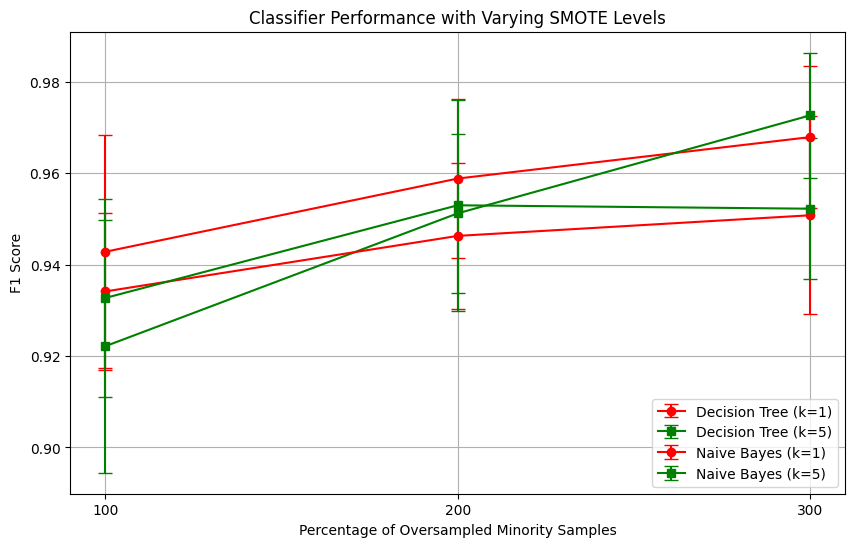

In [64]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score
from sklearn.model_selection import StratifiedKFold

def cross_validate(model, X, y, k=10):
    skf = StratifiedKFold(n_splits=k)
    scores = []  
    for train_index, test_index in skf.split(X, y):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        
        model.fit(X_train, y_train)
        
        predictions = model.predict(X_test)
        
        score = f1_score(y_test, predictions)
        
        scores.append(score)
    return scores

def plot_performance(X, y):
    # Define k values for SMOTE and oversampling percentages
    k_values = [1, 5]
    percentages = [100, 200, 300]
    
    # Define classifiers to evaluate
    classifiers = {
        "Decision Tree": DecisionTreeClassifier(max_depth=3),
        "Naive Bayes": GaussianNaiveBayes() 
    }

    # Prepare dictionaries to store results and errors
    results = {name: {k: [] for k in k_values} for name in classifiers.keys()}
    errors = {name: {k: [] for k in k_values} for name in classifiers.keys()}

    # Base counts of the minority and majority classes
    n_minority = np.sum(y == 1)
    n_majority = np.sum(y == 0)

    for k in k_values:
        for percentage in percentages:
            # Number of synthetic samples to generate
            n_synthetic = int(n_minority * (percentage / 100))
            
            # Apply SMOTE to create synthetic samples
            X_resampled, y_resampled = smote(X, y, k_neighbors=k, n_synthetic_samples=n_synthetic)

            # Evaluate each classifier using cross-validation
            for name, clf in classifiers.items():
                scores = cross_validate(clf, X_resampled, y_resampled, k=10)  
                results[name][k].append(np.mean(scores)) 
                errors[name][k].append(np.std(scores)) 

    # Plotting the results
    plt.figure(figsize=(10, 6))
    markers = ['o-', 's-']
    colors = ['red', 'green']
    idx = 0

    # Iterate through classifiers and plot their results
    for name, data in results.items():
        for k, scores in data.items():
            err = errors[name][k]
            marker = markers[idx % len(markers)]
            color = colors[idx % len(colors)]
            plt.errorbar(percentages, scores, yerr=err, fmt=marker, color=color, capsize=5, label=f'{name} (k={k})')
            idx += 1

    # Add title and labels to the plot
    plt.title("Classifier Performance with Varying SMOTE Levels")
    plt.xlabel("Percentage of Oversampled Minority Samples")
    plt.ylabel("F1 Score")
    plt.legend()
    plt.grid(True)
    plt.xticks(percentages)
    plt.show()

# Assuming X and y are defined and properly preprocessed
plot_performance(X.values, y.values)


---

##  Graph 4: Classifier Performance with Varying SMOTE Levels

### Decision Tree (k=1 versus k=5):

The Decision Tree classifier exhibits an increasing trend in F1 Score for both k=1 and k=5, in proportion to the growth in the percentage of oversampled minority samples. Although k=1 and k=5 have somewhat similar F1 Scores, k=5 performs marginally better, particularly at greater oversampling levels.

In contrast to k=5, the Naive Bayes classifier exhibits a rising trend in F1 Score with increased percentages of oversampled minority samples, much like the Decision Tree. In Naive Bayes, there is a more noticeable performance difference between k=1 and k=5, with k=5 regularly outperforming k=1.

### Comparing Different Classifiers:

Generally, for all SMOTE levels and k values, the Decision Tree classifier outperforms the Naive Bayes classifier in terms of F1 Scores. Higher SMOTE values help both classifiers, suggesting that oversampling enhances their capacity to manage unbalanced input.

### In summary:

The graph shows that using SMOTE enhances the performance of the classifiers, with higher F1 Scores being associated with oversampled minority sample percentages. The Decision Tree with k=5 performs the best across the assessed classifiers and SMOTE levels, while higher k values and SMOTE percentages also greatly help Naive Bayes.

---